# Bienvenidos al proyecto de Ciencia de Datos de Christian Dziczek


En este proyecto analizaremos un Dataset sobre **Fallecimientos en Siniestros de Tránsito** en el período de 2013-2019.

El Dataset mencionado es una compilación de 6 Datasets distintos, es decir, el Dataset de cada año fue integrado de forma manual en un mismo excel para tener la información consolidada en un solo archivo.
Dichos datasets fueron extraídos de: https://catalogodatos.gub.uy/dataset/



### Definición del proyecto y objetivos
#### Objetivo general
- Analizar un conjunto de datos sobre accidentes de tránsito y fallecimientos relacionados con esos accidentes.
- Identificar factores de riesgo, hacer análisis temporal, geográfico y demográfico.
- Predecir diferentes probabilidades (fallecimientos, supervivencia y accidentes) según distintas variables (tipo de vehículo, rango etario, rango horario).

### Objetivos específicos

#### Factores de riesgo
- ¿Qué factores están más relacionados con el fallecimiento?
Análisis temporal
- Evolución de la cantidad de fallecimientos por año.
#### Zonas críticas
- Mapear geográficamente las zonas con mayor cantidad de accidentes/fallecimientos.
#### Análisis demográfico
- Rango etario más afectado.
- Diferencias por género.
#### Posibles predicciones:
- ¿Qué factores aumentan la probabilidad de fallecer inmediatamente?
- ¿Qué condiciones pueden permitir que una víctima sobreviva más tiempo tras el accidente?

### Principales Hipótesis:

- La mayor cantidad de accidentes se produce los fines de semana
- La Moto es el vehículo más incidente en los fallecimientos
- La mayor cantidad de accidentes se produce en la Tarde

# Damos inicio con nuestro proyecto:

In [81]:
# Como primera instancia cargamos las librerías que vayamos a usar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.plugins import HeatMap
import locale
import folium
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "6"  # Esto es para evitar un error que me daba VS
from PIL import Image
import requests
from io import BytesIO
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, time
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [82]:
# Cargamos nuestro DATASET

df = pd.read_csv(r"C:\Users\chris\OneDrive\Documentos\CoderHouse\Data Science II Machine Learning para la Ciencia de Datos\Proyecto\datos-fallecidos-en-siniestros-de-trnsito-2013-2019.csv", encoding="latin1", delimiter=";")

In [83]:
# Damos un primer vistazo a la estructura de nuestro dataset

df.shape

(3477, 16)

In [84]:
# Observamos las primeras filas

df.head()

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,01/01/2013,23:15:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0,NaN,RUTA 101 km 24,"589815,34","6143862,76"
1,01/01/2013 23:35,01/01/2013,23:35:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,"411579,77","6526872,77"
2,03/01/2013 23:35,03/01/2013,23:35:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8,CAMION,RUTA 3 km. 358,"412321,54","6407067,58"
3,04/01/2013 7:10,04/01/2013,7:10:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1,NaN,RUTA 21 esq. Dr Irastorza,"379424,37","6240356,26"
4,04/01/2013 11:00,04/01/2013,11:00:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0,NaN,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,"570675,1","6164479,53"


#### Vemos que nuestro dataset consta de 3477 lineas y 16 columnas

In [85]:
# Mostramos columbnas

df.columns

Index(['Fecha y hora', 'Fecha', 'Hora', 'Departamento', 'Localidad',
       'Jurisdiccion ', 'Tipo de Siniestro', 'Vehiculo', 'Rol', 'Edad', 'Sexo',
       'Fallecido a los Dias', 'Otro vehiculo', 'Lugar del Siniestro', 'X',
       'Y'],
      dtype='object')

In [86]:
# Vemos qué tipo de datos hay

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3477 entries, 0 to 3476
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Fecha y hora          3477 non-null   object 
 1   Fecha                 3477 non-null   object 
 2   Hora                  3477 non-null   object 
 3   Departamento          3477 non-null   object 
 4   Localidad             3477 non-null   object 
 5   Jurisdiccion          3477 non-null   object 
 6   Tipo de Siniestro     3477 non-null   object 
 7   Vehiculo              3477 non-null   object 
 8   Rol                   3477 non-null   object 
 9   Edad                  3433 non-null   float64
 10  Sexo                  3476 non-null   object 
 11  Fallecido a los Dias  3477 non-null   int64  
 12  Otro vehiculo         2405 non-null   object 
 13  Lugar del Siniestro   3477 non-null   object 
 14  X                     3476 non-null   object 
 15  Y                    

#### Vemos que nuestro dataset tiene varios tipos de formato. También observamos que ciertas columnas contienen datos nulos

## Diccionario de Datos

| **Nombre de la Columna**     | **Descripción**                                                                                                  | **Tipo de Dato (actual)** | **Posibles Valores / Rango**                                                                                   |
|------------------------------|------------------------------------------------------------------------------------------------------------------|----------------------------|--------------------------------------------------------------------------------------------------------------|
| **Fecha y hora**            | Fecha y hora del accidente en un solo texto.                              | object                     | Ejemplo: “2016-07-15 14:30”                                        |
| **Fecha**                    | Fecha del accidente.                                               | object                     | Ejemplo: “2020-07-15”.                                                                                       |
| **Hora**                     | Hora del accidente (actualmente en texto). Se podría convertir a entero (0-23) o a tipo “time”.                  | object                     | Ejemplo: “14:30” o “14”.                                                                                     |
| **Departamento**             | Nombre del departamento (o región administrativa).                                                               | object                     | Ejemplo: “Montevideo”, “Canelones”.                                                                          |
| **Localidad**                | Nombre de la localidad o ciudad específica.                                                                      | object                     | Dependerá de la zona geográfica.                                                                             |
| **Jurisdiccion**             | Tipo de jurisdicción (por ejemplo, policía local, nacional, etc.).                                               | object                     | Ej.: “Municipal”, “Departamental”.                                                                           |
| **Tipo de Siniestro**        | Clasificación del accidente: colisión, atropello, vuelco, etc.                                                   | object                     | Ejemplo: “Colisión Múltiple”, “Atropello Peatón”, “Vuelco”.                                                 |
| **Vehiculo**                 | Tipo de vehículo involucrado principal.                                                                          | object                     | Ejemplo: “Auto”, “Moto”, “Camión”.                                                                          |
| **Rol**                      | Rol de la persona (conductor, pasajero, peatón, etc.).                                                           | object                     | Ej.: “Conductor”, “Pasajero”, “Peatón”.                                                                     |
| **Edad**                     | Edad del individuo involucrado en el accidente.                                                                  | float64                    | Ejemplo: 0.0 a 99.0.                                                  |
| **Sexo**                     | Género de la persona involucrada.                                                                                | object                     | Ej.: “M”, “F”, “Sin Dato”.                                                                                   |
| **Fallecido a los Dias**     | Indica si falleció días después del accidente (y cuántos).                                                       | int64                      | Ej.: "0" , "1" , etc.                                                 |
| **Otro vehiculo**            | Nombre o tipo del segundo vehículo involucrado (si aplica).                                                      | object                     | Ej.: “Camioneta”, “Moto”, “Ninguno”.                                                                        |
| **Lugar del Siniestro**      | Descripción textual del lugar (ej. intersección, ruta, calle, etc.).                                             | object                     | Texto libre.                                                                                                 |
| **X**                        | Coordenada X (posiblemente longitud o coordenada planar).                                                         | float64                    | Rango aproximado según la zona geográfica.                                             |
| **Y**                        | Coordenada Y (posiblemente latitud o coordenada planar).                                                          | float64                    | Rango aproximado según la zona geográfica.                                             |


#### Este diccionario de datos nos puede servir de guía a la hora de verificar campos


In [87]:
# Como habíamos visto que nuestro dataset tenía nulos, veamos cuantos y en qué proporción

df.isnull().sum()



Fecha y hora               0
Fecha                      0
Hora                       0
Departamento               0
Localidad                  0
Jurisdiccion               0
Tipo de Siniestro          0
Vehiculo                   0
Rol                        0
Edad                      44
Sexo                       1
Fallecido a los Dias       0
Otro vehiculo           1072
Lugar del Siniestro        0
X                          1
Y                          1
dtype: int64

In [88]:
# Proporcion en %
(df.isnull().sum() / len(df)) * 100

Fecha y hora             0.000000
Fecha                    0.000000
Hora                     0.000000
Departamento             0.000000
Localidad                0.000000
Jurisdiccion             0.000000
Tipo de Siniestro        0.000000
Vehiculo                 0.000000
Rol                      0.000000
Edad                     1.265459
Sexo                     0.028760
Fallecido a los Dias     0.000000
Otro vehiculo           30.831176
Lugar del Siniestro      0.000000
X                        0.028760
Y                        0.028760
dtype: float64

#### Vemos que 5 de nuestras 16 columnas contienen datos nulos.
- Para edad, rellenaremos los datos con la mediata de ésta
- Para Sexo, rellenaremos con el valor más común
- Para otro vehículo, rellenaremos con 'Sin Información'
- Como los valores nulos en X e Y son muy escasos, los eliminaremos

In [89]:
# En el caso de Edad lo rellenamos con la Mediana

df['Edad'].fillna(df['Edad'].median(), inplace=True)

# En el caso de Sexo rellenamos con el valor más frecuente

df['Sexo'].fillna(df['Sexo'].mode()[0], inplace=True)

# En el caso de Otro Vehiculo lo rellenamos con 'Sin información'

df['Otro vehiculo'].fillna("Sin información", inplace=True)

# Como los valores de X e Y son escasos, los eliminamos

df.dropna(subset=['X', 'Y'], inplace=True)

# Verificamos nuevamente los valores nulos

print("\nValores nulos después del tratamiento:")
print(df.isnull().sum())


Valores nulos después del tratamiento:
Fecha y hora            0
Fecha                   0
Hora                    0
Departamento            0
Localidad               0
Jurisdiccion            0
Tipo de Siniestro       0
Vehiculo                0
Rol                     0
Edad                    0
Sexo                    0
Fallecido a los Dias    0
Otro vehiculo           0
Lugar del Siniestro     0
X                       0
Y                       0
dtype: int64


C:\Users\chris\AppData\Local\Temp\ipykernel_12828\519195732.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Edad'].fillna(df['Edad'].median(), inplace=True)
C:\Users\chris\AppData\Local\Temp\ipykernel_12828\519195732.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

#### Ahora nuestro dataset quedó libre de valores Nulos. Nuestro siguiente paso es hacer las converciones que sean necesarias

In [90]:
# Ahora hacemos un pequeño ajuste en las columnas Edad y Fallecidos a los Días. Las convertimos en numéricas

df['Edad'] = pd.to_numeric(df['Edad'], errors='coerce')
df['Fallecido a los Dias'] = pd.to_numeric(df['Fallecido a los Dias'], errors='coerce')

In [91]:
# Tambien convertimos la columna 'Fecha' al formato datetime, Hora a Time y las coordenadas X e Y
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d/%m/%Y', errors='coerce')
df['Hora'] = pd.to_datetime(df['Hora'], format='%H:%M:%S', errors='coerce').dt.time
df['X'] = df['X'].str.replace(',', '.').astype(float)
df['Y'] = df['Y'].str.replace(',', '.').astype(float)

In [92]:
#Verificamos cambios

df.head()

,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,Sexo,Fallecido a los Dias,Otro vehiculo,Lugar del Siniestro,X,Y
0,01/01/2013 23:15,2013-01-01,23:15:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,F,0,Sin información,RUTA 101 km 24,589815.34,6143862.76
1,01/01/2013 23:35,2013-01-01,23:35:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,F,0,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,411579.77,6526872.77
2,03/01/2013 23:35,2013-01-03,23:35:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,M,8,CAMION,RUTA 3 km. 358,412321.54,6407067.58
3,04/01/2013 7:10,2013-01-04,07:10:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,F,1,Sin información,RUTA 21 esq. Dr Irastorza,379424.37,6240356.26
4,04/01/2013 11:00,2013-01-04,11:00:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,M,0,Sin información,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,570675.10,6164479.53


#### Una vez que tenemos nuestro dataset libre de datos nulos y con las converciones hechas, pasamos a la deteccion de outliers y, si aplica, su respectivo tratamiento.


Gráfico de outliers en 'Edad':


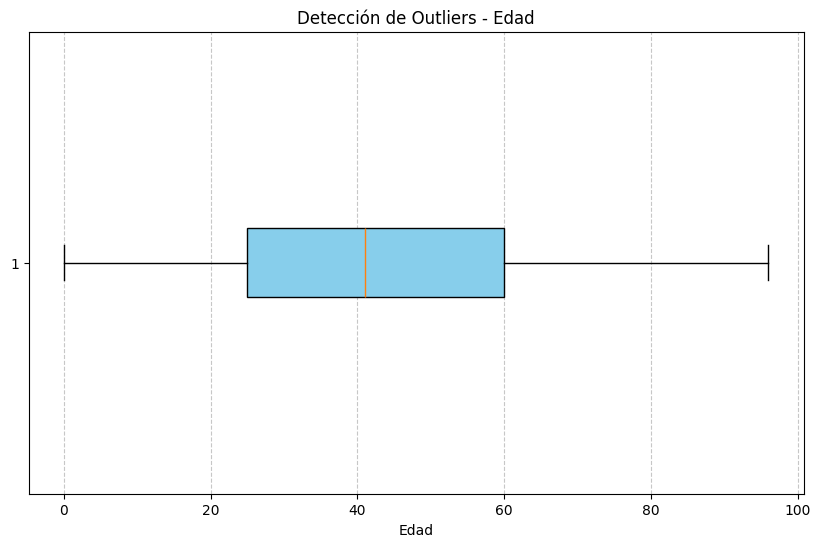


Gráfico de outliers en 'Fallecido a los Dias':


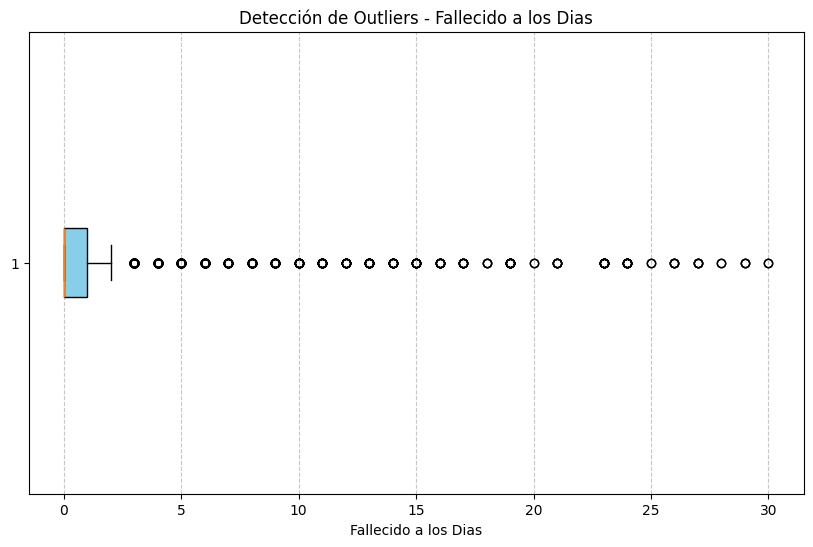


Distribución de 'Hora' en formato numérico (opcional si aplicable):


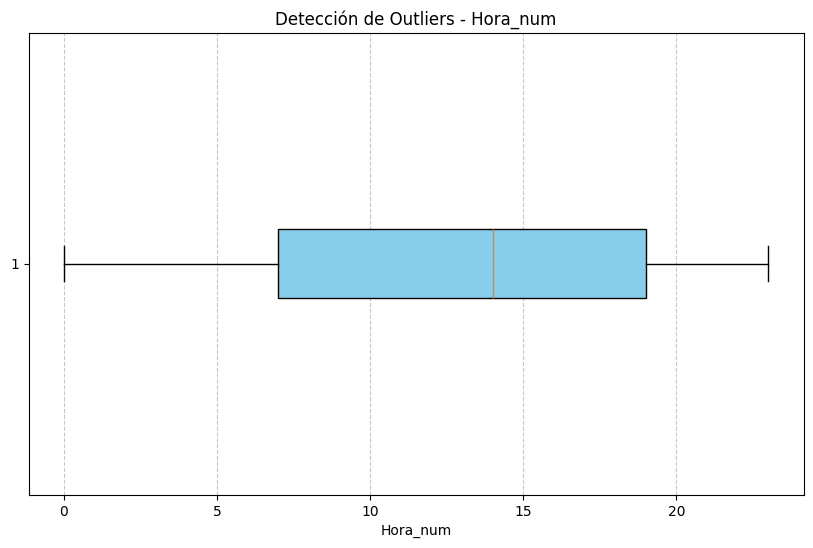


Resumen estadístico después del análisis gráfico de outliers:
              Edad  Fallecido a los Dias     Hora_num
count  3476.000000            3476.00000  3476.000000
mean     43.147871               1.43786    12.890391
std      21.139768               3.77228     6.544309
min       0.000000               0.00000     0.000000
25%      25.000000               0.00000     7.000000
50%      41.000000               0.00000    14.000000
75%      60.000000               1.00000    19.000000
max      96.000000              30.00000    23.000000


In [93]:
# Detección de outliers con gráficos
def graficar_outliers(df, column_name):
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[column_name].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor="skyblue"))
    plt.title(f"Detección de Outliers - {column_name}")
    plt.xlabel(column_name)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.show()

# Outliers en 'Edad'
print("\nGráfico de outliers en 'Edad':")
graficar_outliers(df, 'Edad')

# Outliers en 'Fallecido a los Dias'
print("\nGráfico de outliers en 'Fallecido a los Dias':")
graficar_outliers(df, 'Fallecido a los Dias')

# Como 'Hora' es cíclica, representamos su distribución si fuera numérica
print("\nDistribución de 'Hora' en formato numérico (opcional si aplicable):")
df['Hora_num'] = df['Hora'].apply(lambda x: x.hour if pd.notnull(x) else None)
graficar_outliers(df, 'Hora_num')

# Confirmar después del análisis de outliers
print("\nResumen estadístico después del análisis gráfico de outliers:")
print(df[['Edad', 'Fallecido a los Dias', 'Hora_num']].describe())


#### Con el describe podemos apreciar lo siguiente:

- La mayoría de personas muere el mismo día del accidente
- Más de la mitad de los fallecidos son adultos
- A primera vista no parece haber outliers significativos. Si bien Fallecidos a los Dias parece presentar outliers, es lógico, ya que muchas personas pueden haber fallecido en el correr de los días dadas las lesiones de los accidentes.

### Ahora pasemos a una vista un poco más gráfica de nuestras variables principales

In [94]:
# Categorizar las horas en franjas horarias
def categorizar_hora(hora):
    if isinstance(hora, time):
        if hora >= time(5, 0) and hora < time(12, 0):
            return 'Mañana'
        elif hora >= time(12, 0) and hora < time(15, 0):
            return 'Mediodía'
        elif hora >= time(15, 0) and hora < time(20, 0):
            return 'Tarde'
        elif hora >= time(20, 0) and hora <= time(23, 59):
            return 'Noche'
        else:
            return 'Madrugada'
    return 'Desconocido'

df['Franja Horaria'] = df['Hora'].apply(categorizar_hora)


In [95]:
# Categorizar las edades
def categorizar_edad(edad):
    if pd.notnull(edad):
        if edad < 13:
            return 'Niño'
        elif edad < 18:
            return 'Adolescente'
        elif edad < 60:
            return 'Adulto'
        else:
            return 'Mayor'
    return 'Desconocido'

df['Grupo Etario'] = df['Edad'].apply(categorizar_edad)


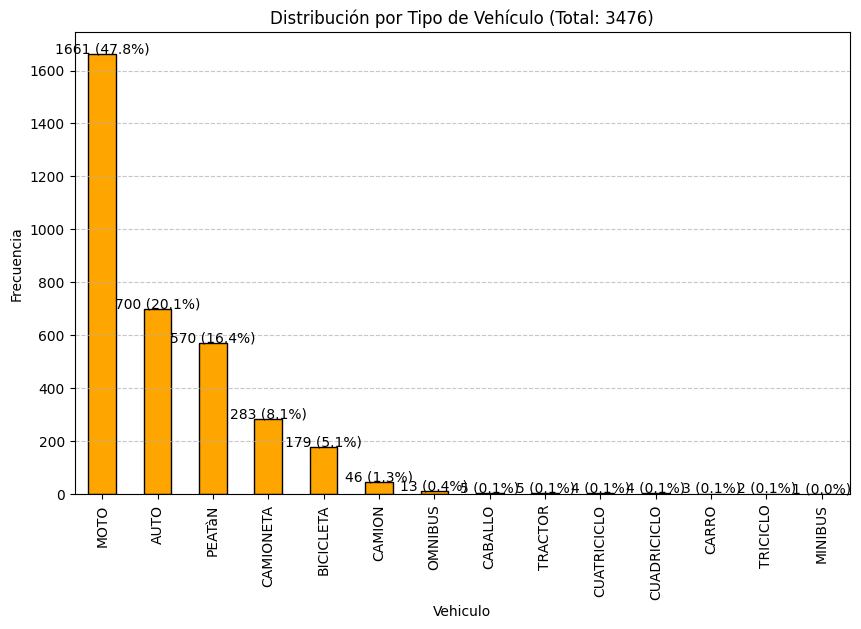

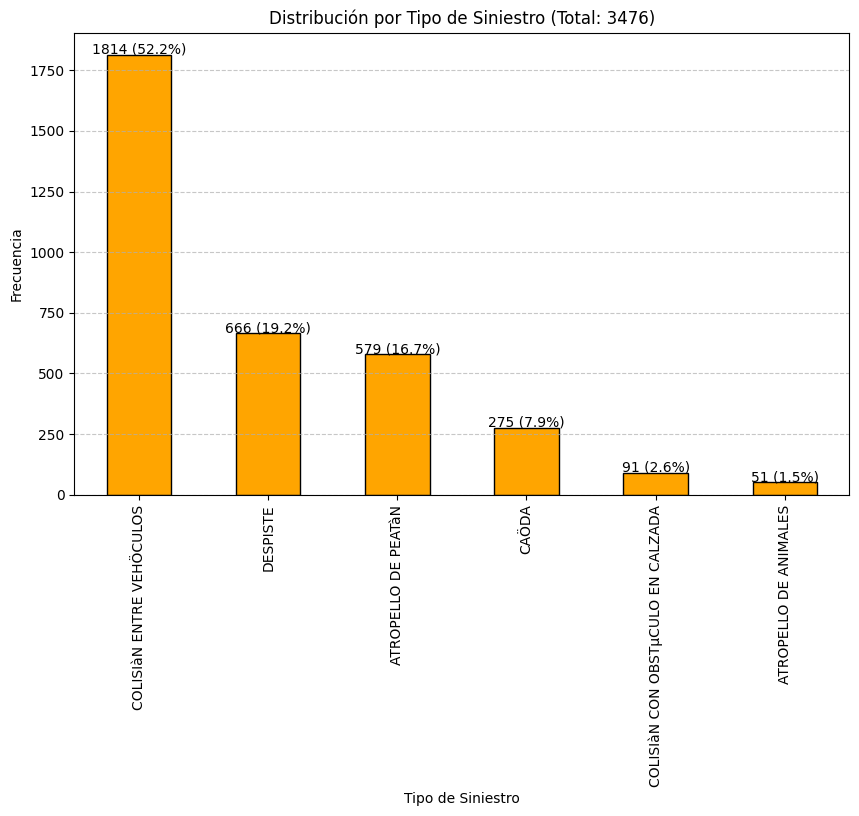

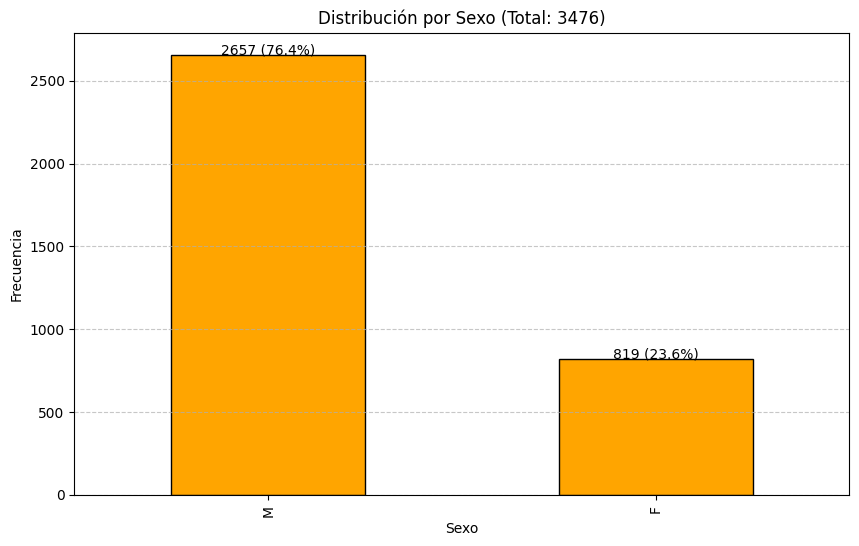

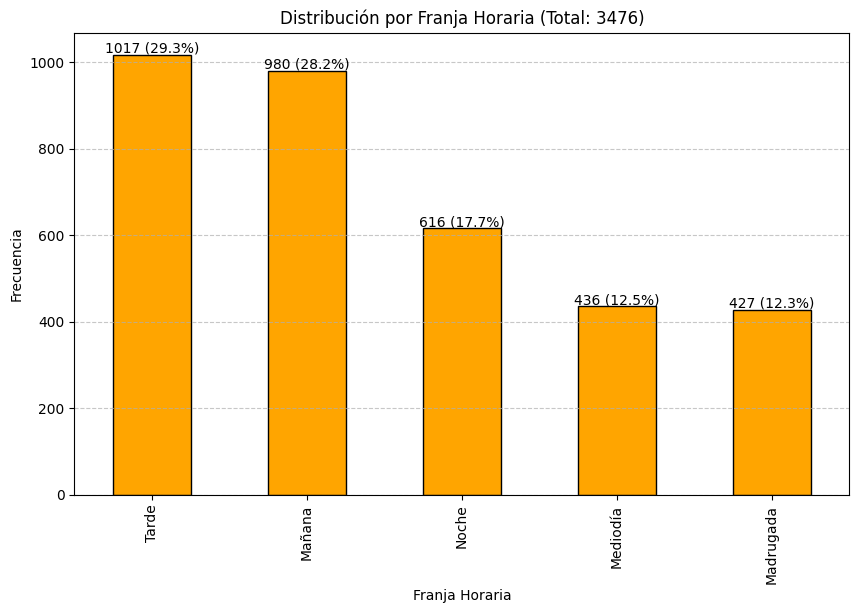

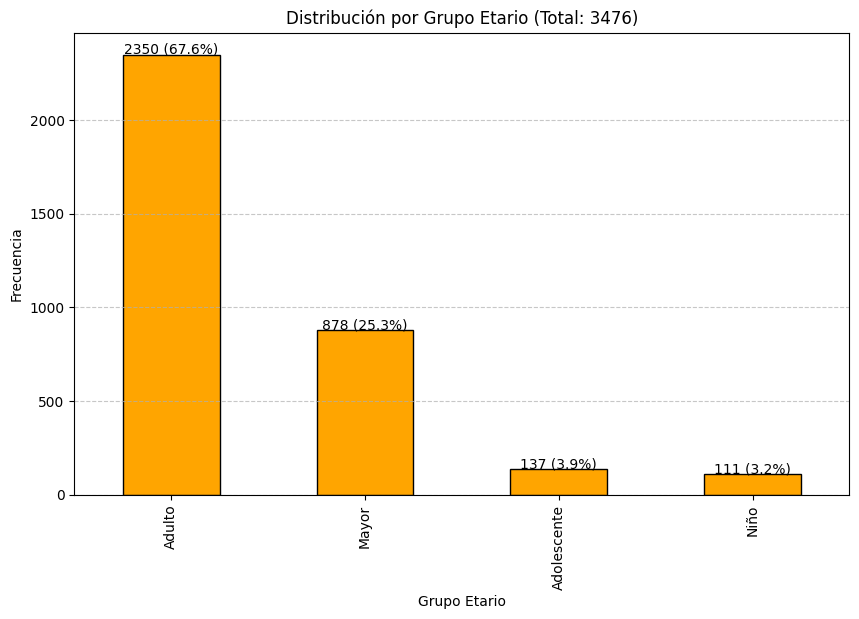

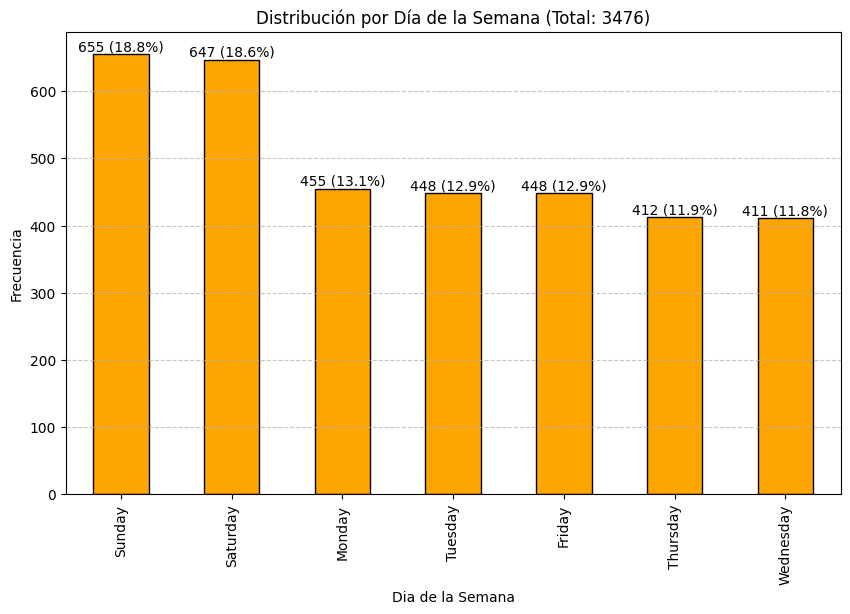

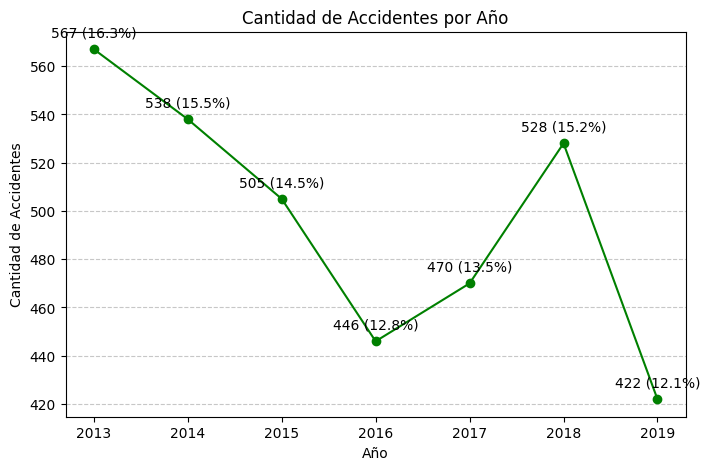

In [96]:
# Crear una columna para el día de la semana
df['Dia de la Semana'] = df['Fecha'].dt.day_name()

# Análisis univariado con etiquetas en las barras y suma total y porcentaje
def plot_categorical_distribution(column_name, title):
    plt.figure(figsize=(10, 6))
    counts = df[column_name].value_counts()
    total = counts.sum()
    ax = counts.plot(kind='bar', color='orange', edgecolor='black')
    plt.title(f"{title} (Total: {total})")
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Agregar valores y porcentajes encima de las barras
    for i, (v, p) in enumerate(zip(counts, counts / total * 100)):
        ax.text(i, v + 5, f"{v} ({p:.1f}%)", ha='center', fontsize=10)
    
    plt.show()

plot_categorical_distribution('Vehiculo', 'Distribución por Tipo de Vehículo')
plot_categorical_distribution('Tipo de Siniestro', 'Distribución por Tipo de Siniestro')
plot_categorical_distribution('Sexo', 'Distribución por Sexo')
plot_categorical_distribution('Franja Horaria', 'Distribución por Franja Horaria')
plot_categorical_distribution('Grupo Etario', 'Distribución por Grupo Etario')
plot_categorical_distribution('Dia de la Semana', 'Distribución por Día de la Semana')

# Análisis de las variables temporales con formato de línea y cifras
df['Año'] = df['Fecha'].dt.year
plt.figure(figsize=(8, 5))
counts_by_year = df['Año'].value_counts().sort_index()
ax = counts_by_year.plot(kind='line', marker='o', color='green')
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar valores y porcentajes encima de los puntos en el gráfico de línea
for i, (v, p) in enumerate(zip(counts_by_year, counts_by_year / counts_by_year.sum() * 100)):
    ax.annotate(f"{v} ({p:.1f}%)", xy=(counts_by_year.index[i], v), xytext=(counts_by_year.index[i], v + 5), ha='center')

plt.show()

## Zonas críticas

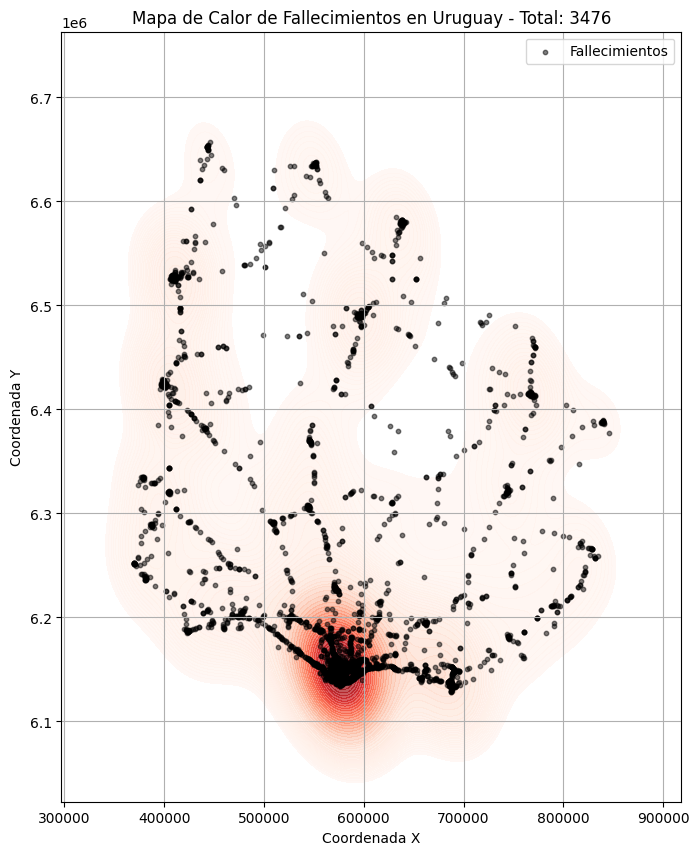

In [97]:
# Crear el mapa de calor
plt.figure(figsize=(8, 10))
sns.kdeplot(x=df["X"], y=df["Y"], cmap="Reds", fill=True, levels=50, alpha=0.7)
plt.scatter(df["X"], df["Y"], c="black", s=10, alpha=0.5, label="Fallecimientos")
plt.xlabel("Coordenada X")
plt.ylabel("Coordenada Y")
plt.title(f"Mapa de Calor de Fallecimientos en Uruguay - Total: {df.shape[0]}")
plt.legend()
plt.grid(True)
plt.show()

##### Podemos observr que la mayor concentración de fallecimientos se encuentra en Montevideo y Zona Metropolitana.
##### Ahora haremos un conteo por departamento para confirmar nuestra observación.

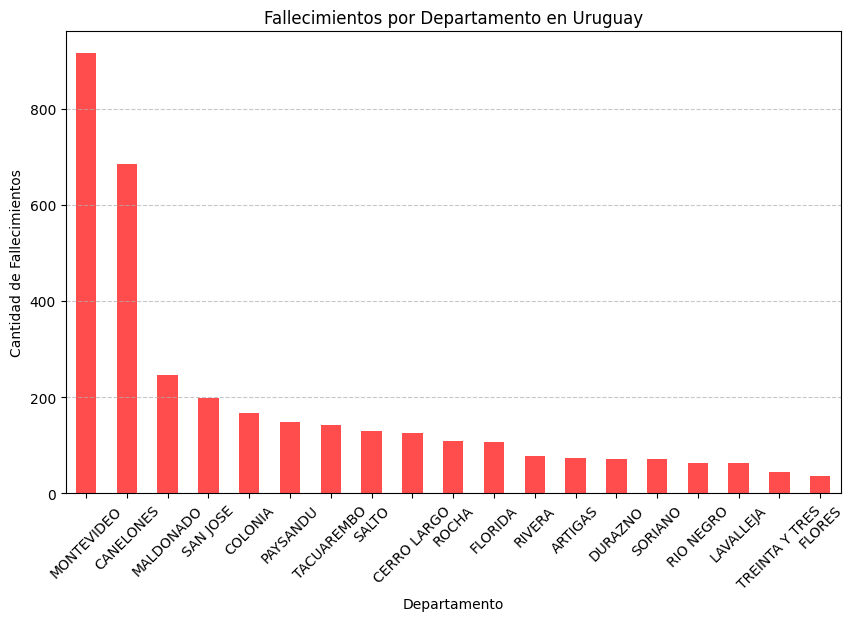

In [98]:
# Recuento de fallecimientos por departamento
recuento_departamento = df["Departamento"].value_counts()

# Crear gráfico de barras
plt.figure(figsize=(10, 6))
recuento_departamento.plot(kind="bar", color="red", alpha=0.7)
plt.xlabel("Departamento")
plt.ylabel("Cantidad de Fallecimientos")
plt.title("Fallecimientos por Departamento en Uruguay")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


##### Como mencionamos anteriormente, vemos que Montevideo y Canelones lideran la lista de Fallecimientos por Departamento.

### Conclusiones:

#### Con los siguientes gráficos podemos concluír que:

- Como mencionamos en una de nuestras hipótesis; **la moto es el principal protagonista de los accidentes**, siendo este el 47.8 % de la totalidad
- Nuevamente confirmamos otra hipótesis; **la mayor concentración de accidentes se encuenta en los fines de semana**, representando el 37 % aprox de la totalidad.
- Los adultos entre 18 y 60 años es el rango etario más afectado por los accidentes, siento este casi el 70 % de la totalidad.
- Colisión entre vehículos es tipo de accidente más incidente en los fallecimientos.
- Otra hipótesis confirmada; **La mayor cantidad de accidentes ocurre en la tarde**, con un 29.3 %. Muy de cerca está la Mañana, con un 28.2 %. Esto tiene lógica ya que la mayor concentración de tránsito se encuentra en las mañanas y en las tardes.
- El hombre representa un 76.4 % de la totalidad de fallecimientos, siendo la mujer un 23.6 %. Esto significa que, por cada mujer, mueren casi 4 hombres. 
- Notamos que la cantidad de fallecimientos por año venía a la baja hasta 2016. Luego Durante este año empezó a aumentar, teniendo un pico de 528 fallecidos en 2018, con un posterior descenso hasta 2019. En nuestro dataset no tenemos la información necesaria, pero podríamos habría que ver si durante 2016 y 2018 hubo aumento de eventos sociales, o algo que haya producido ese pico en los fallecimientos.
- Como era esperable, la mayor cantidad de fallecimientos se da dentro de Montevideo y en la Zona Metropolitana. Esto hace mucho sentido ya que es el territorio del País con más población, urbanización y movimiento vial.

#### Ahora cruzaremos variables para ver la relación entre ellas

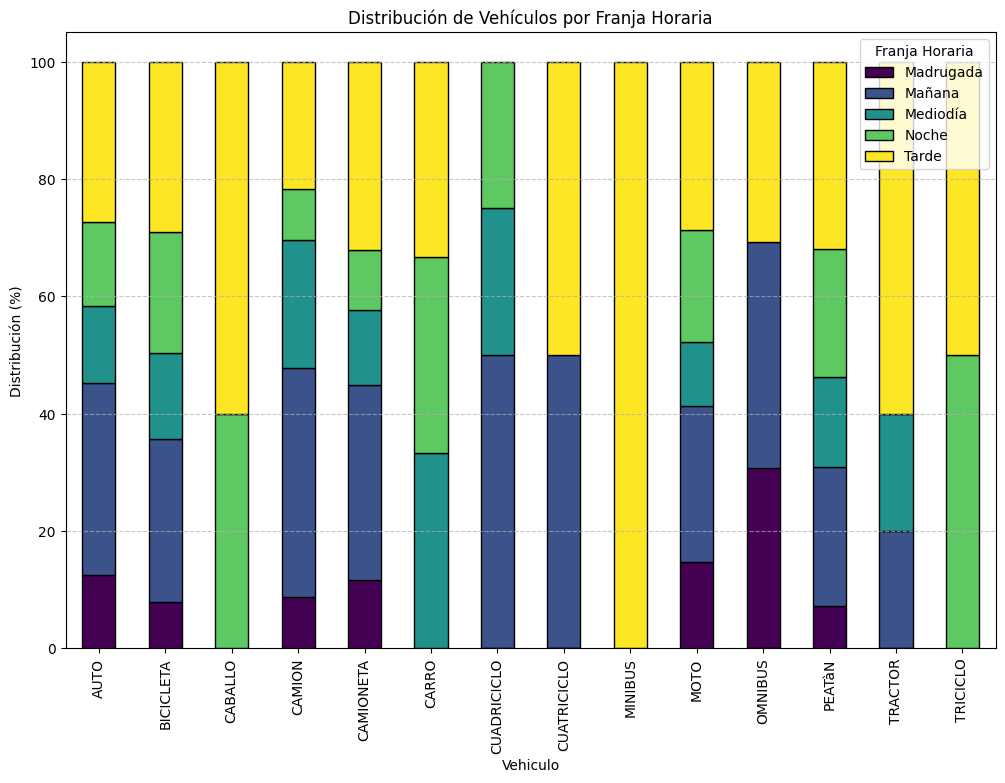

<Figure size 1200x800 with 0 Axes>

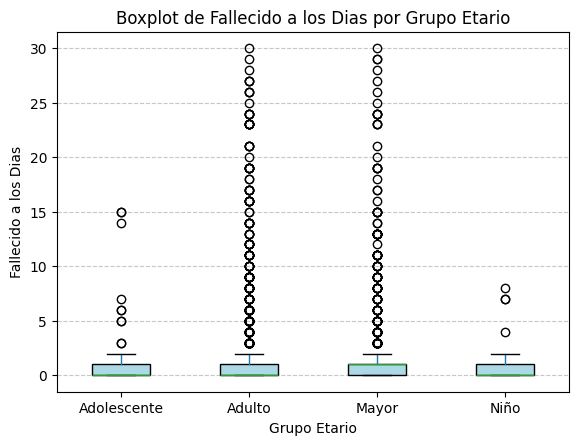

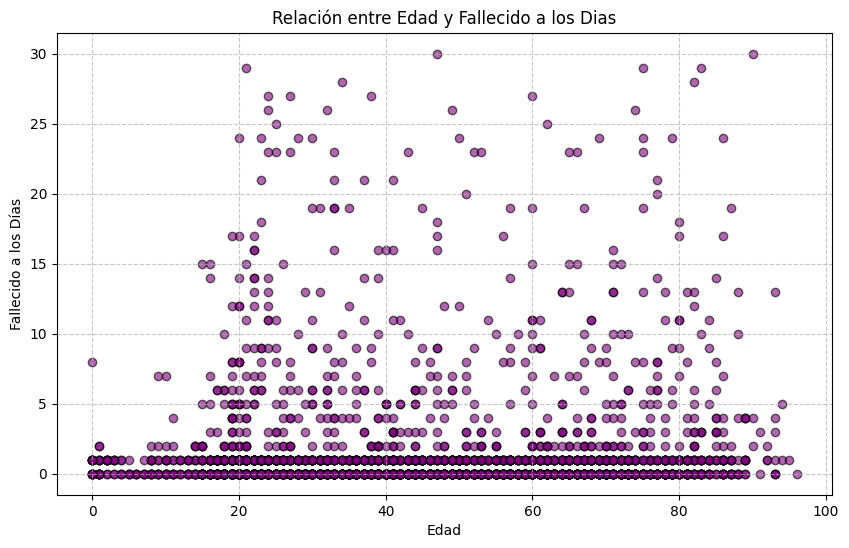

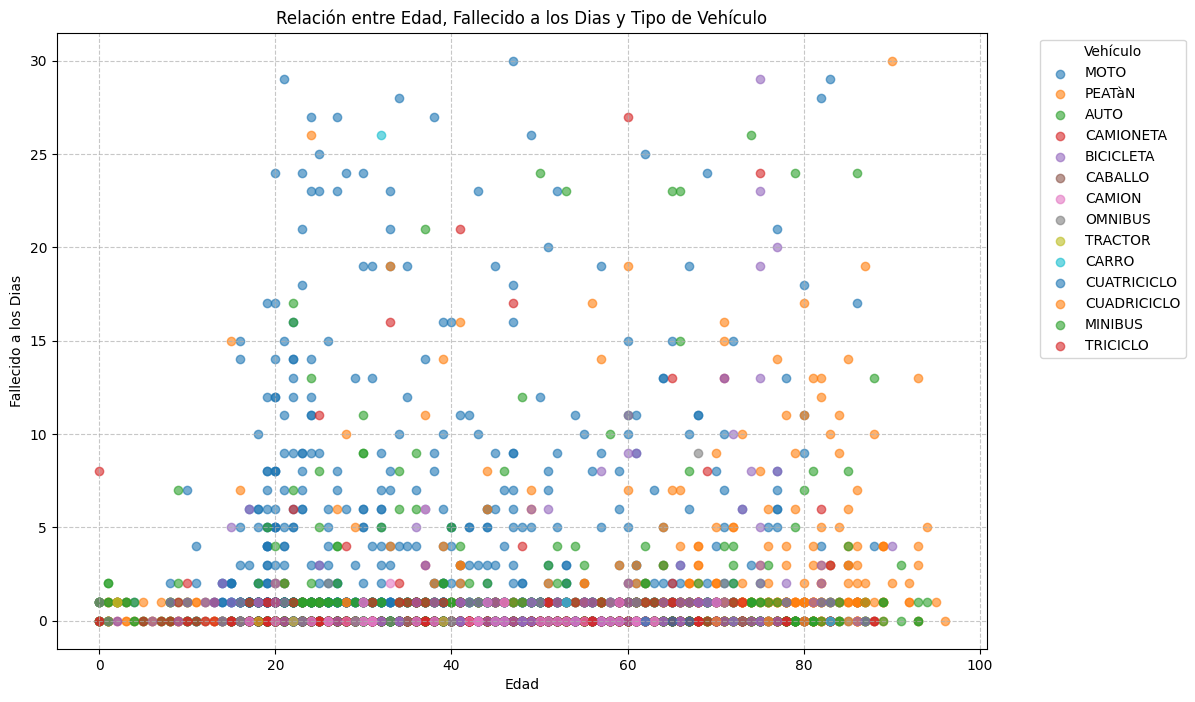

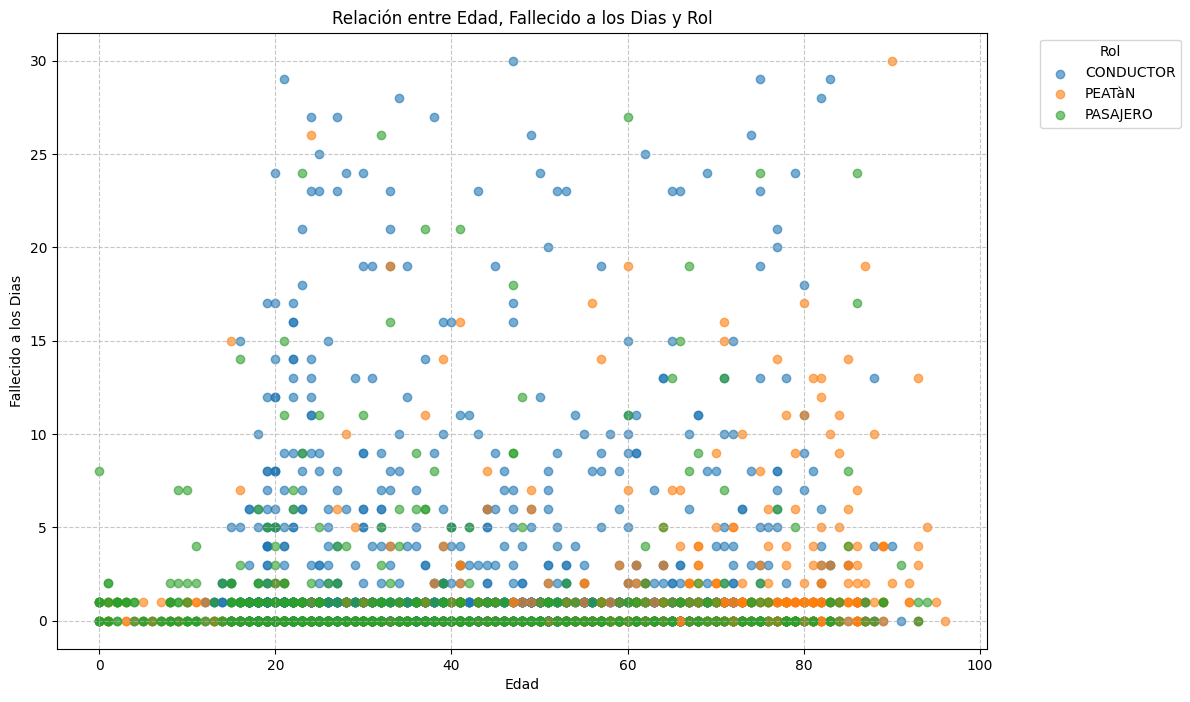

In [99]:
# 1. Tipo de Vehículo vs Franja Horaria
def plot_bivariate_categorical(cat1, cat2, title):
    plt.figure(figsize=(12, 8))
    crosstab = pd.crosstab(df[cat1], df[cat2], normalize='index') * 100
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis', edgecolor='black')
    plt.title(title)
    plt.xlabel(cat1)
    plt.ylabel('Distribución (%)')
    plt.legend(title=cat2)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_bivariate_categorical('Vehiculo', 'Franja Horaria', 'Distribución de Vehículos por Franja Horaria')

# 2. Grupo Etario vs Fallecido a los Días
def plot_bivariate_boxplot(cat, num, title):
    plt.figure(figsize=(12, 8))
    df.boxplot(column=num, by=cat, grid=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(title)
    plt.suptitle('')  # Remover título automático
    plt.xlabel(cat)
    plt.ylabel(num)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_bivariate_boxplot('Grupo Etario', 'Fallecido a los Dias', 'Boxplot de Fallecido a los Dias por Grupo Etario')

# 3. Edad vs Fallecido a los Días
plt.figure(figsize=(10, 6))
plt.scatter(df['Edad'], df['Fallecido a los Dias'], alpha=0.6, color='purple', edgecolor='black')
plt.title('Relación entre Edad y Fallecido a los Dias')
plt.xlabel('Edad')
plt.ylabel('Fallecido a los Días')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# 3. Edad vs Fallecido a los Días cruzado con Vehículo
plt.figure(figsize=(12, 8))
for vehiculo in df['Vehiculo'].unique():
    subset = df[df['Vehiculo'] == vehiculo]
    plt.scatter(subset['Edad'], subset['Fallecido a los Dias'], alpha=0.6, label=vehiculo)

plt.title('Relación entre Edad, Fallecido a los Dias y Tipo de Vehículo')
plt.xlabel('Edad')
plt.ylabel('Fallecido a los Dias')
plt.legend(title='Vehículo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# 4. Edad vs Fallecido a los Días cruzado con Rol
plt.figure(figsize=(12, 8))
for rol in df['Rol'].unique():
    subset = df[df['Rol'] == rol]
    plt.scatter(subset['Edad'], subset['Fallecido a los Dias'], alpha=0.6, label=rol)

plt.title('Relación entre Edad, Fallecido a los Dias y Rol')
plt.xlabel('Edad')
plt.ylabel('Fallecido a los Dias')
plt.legend(title='Rol', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

### Conclusión de **Tipo de Vehículo vs Franja Horaria**

Este gráfico permite identificar patrones claros de uso y riesgo para cada tipo de vehículo según la franja horaria. Por ejemplo:

- Las motos son más prevalentes en accidentes durante la noche y madrugada.
- Autos tienen mayor incidencia en accidentes en horarios diurnos.
- Ómnibus y camiones aparecen más relevantes en madrugada y noche.
Esto podría orientar estrategias específicas de prevención, como controles por franjas horarias y campañas educativas para ciertos grupos de conductores.


### Conclusión de **Fellecido a los Dias por Grupo Etario**

- La mayoría de los fallecimientos ocurren en el día del accidente (día 0).
- Hay casos significativos de fallecimientos tardíos (días después del accidente), que son más notables en adolescentes, adultos y mayores.

### Relación entre Edad, Fallecido a los Dias y Tipo de Vehículo

- Las motos tienen una distribución más dispersa en cuanto a los días hasta el fallecimiento, indicando que los motociclistas pueden sobrevivir por más días en ciertos casos.
- Los peatones parecen concentrarse en fallecimientos más inmediatos tras el accidente (días cercanos a 0).
- Vehículos como automóviles y camionetas tienen una dispersión equilibrada, pero también aparecen con algunos casos de fallecimientos más prolongados.
#### Edad y vehículos:

- Las edades más jóvenes (menores de 30 años) están asociadas principalmente a motos y peatones.
- Los adultos mayores tienen presencia en diferentes tipos de vehículos, pero también en peatones, lo que puede reflejar mayor vulnerabilidad en este grupo.
- Fallecimientos diferidos:

- En todas las categorías, hay casos de fallecimientos tardíos (hasta 30 días), pero estos son más comunes en adultos y vehículos motorizados.

### Conclusiones de **Relación entre Edad, Fallecido a los Dias y Rol**
#### Conductores:
- La mayoría de los casos se concentran en el día 0 (fallecimiento inmediato), pero también hay una notable dispersión en días posteriores, especialmente para edades de entre 20 y 50 años.
- Los conductores representan el grupo más numeroso.
#### Peatones:
- También tienen una concentración en el día 0, pero muestran más casos de fallecimientos diferidos en edades avanzadas (60+).
- Esto podría deberse a la vulnerabilidad física de los peatones mayores.
#### Pasajeros:
- Aunque en menor cantidad, también tienen un patrón similar, con una mayor concentración en el día 0.
- Los fallecimientos diferidos son menos comunes en este grupo en comparación con conductores y peatones.
#### Conclusiones:
- Los conductores tienen más casos de fallecimientos diferidos, posiblemente por tratamientos médicos prolongados antes del desenlace.
- Los peatones mayores son especialmente vulnerables, lo que podría ser relevante para campañas de seguridad vial.
- Los pasajeros muestran menos casos diferidos, lo que podría indicar que están menos expuestos a lesiones críticas en comparación con conductores.

# Conclusiones Generales
### Grupos Vulnerables:
- Los peatones mayores y conductores jóvenes son los más vulnerables.
### Patrones Temporales:
- Los accidentes en la madrugada están relacionados con vehículos pesados (ómnibus y camiones).
### Fallecimientos Diferidos:
- Los conductores y usuarios de motos tienen mayor incidencia de fallecimientos diferidos, probablemente debido a lesiones graves.
### Recomendaciones:
- Fortalecer campañas de seguridad para peatones y motociclistas.
- Implementar controles más estrictos en la madrugada.
- Analizar la infraestructura vial para zonas críticas según tipo de vehículo.


# Predicciones

#### Ahora intentaremos predecir lo siguiente:

- ¿Qué factores aumentan la probabilidad de fallecer inmediatamente?
- ¿Qué condiciones pueden permitir que una víctima sobreviva más tiempo tras el accidente?

#### Nuestra variable objetivo será **'Fallecido a los Dias'**. Por esta razón haremos lo siguiente:
- Convertir "Fallecido a los Días" en una variable binaria:
- 0 = Fallecimiento inmediato
- 1 = Fallecimiento tardío

In [100]:
# Transformar la variable objetivo "Fallecido a los Días" en binaria
def definir_fallecimiento_inmediato(row):
    return 1 if row["Fallecido a los Dias"] == 0 else 0  # 1: Fallecimiento inmediato, 0: Fallecimiento tardío

# Aplicar la función al dataset
df["Fallecimiento Inmediato"] = df.apply(definir_fallecimiento_inmediato, axis=1)

# Ver la distribución de la nueva variable
distribucion_fallecimiento = df["Fallecimiento Inmediato"].value_counts(normalize=True)

# Mostrar la distribución
print("Distribución de Fallecimiento Inmediato:")
print(distribucion_fallecimiento)

# Ver los primeros registros con la nueva variable
df.head()

Distribución de Fallecimiento Inmediato:
Fallecimiento Inmediato
1    0.599252
0    0.400748
Name: proportion, dtype: float64


,Fecha y hora,Fecha,Hora,Departamento,Localidad,Jurisdiccion,Tipo de Siniestro,Vehiculo,Rol,Edad,...,Otro vehiculo,Lugar del Siniestro,X,Y,Hora_num,Franja Horaria,Grupo Etario,Dia de la Semana,Año,Fallecimiento Inmediato
0,01/01/2013 23:15,2013-01-01,23:15:00,CANELONES,N/C,NACIONAL,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,...,Sin información,RUTA 101 km 24,589815.34,6143862.76,23,Noche,Adulto,Tuesday,2013,1
1,01/01/2013 23:35,2013-01-01,23:35:00,SALTO,SALTO,DEPARTAMENTAL,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,...,MOTO,MAGALLANES pr¢x. Barrio Chinchurreta,411579.77,6526872.77,23,Noche,Adulto,Tuesday,2013,1
2,03/01/2013 23:35,2013-01-03,23:35:00,PAYSANDU,N/C,NACIONAL,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,...,CAMION,RUTA 3 km. 358,412321.54,6407067.58,23,Noche,Adulto,Thursday,2013,0
3,04/01/2013 7:10,2013-01-04,07:10:00,COLONIA,N/C,NACIONAL,DESPISTE,AUTO,CONDUCTOR,49.0,...,Sin información,RUTA 21 esq. Dr Irastorza,379424.37,6240356.26,7,Mañana,Adulto,Friday,2013,0
4,04/01/2013 11:00,2013-01-04,11:00:00,CANELONES,PROGRESO,DEPARTAMENTAL,DESPISTE,AUTO,CONDUCTOR,91.0,...,Sin información,CESAR MAYO GUTIERREZ senda CAMINO PELUFFO,570675.10,6164479.53,11,Mañana,Mayor,Friday,2013,1


#### Ya que tenemos identificados los fallecimientos inmediatos y los que no, nuestro siguiente paso es:
- Seleccionar las Variables Predictoras

In [101]:
# Seleccionar variables predictoras
variables_predictoras = [
    "Tipo de Siniestro",
    "Vehiculo",
    "Rol",
    "Edad",
    "Grupo Etario",
    "Dia de la Semana",
    "Franja Horaria",
    "Departamento",
]

df_predictoras = df[variables_predictoras]

# Ver la estructura del nuevo dataset de variables predictoras
df_predictoras.info()

# Ver las primeras filas
df_predictoras.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3476 entries, 0 to 3476
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Siniestro  3476 non-null   object 
 1   Vehiculo           3476 non-null   object 
 2   Rol                3476 non-null   object 
 3   Edad               3476 non-null   float64
 4   Grupo Etario       3476 non-null   object 
 5   Dia de la Semana   3476 non-null   object 
 6   Franja Horaria     3476 non-null   object 
 7   Departamento       3476 non-null   object 
dtypes: float64(1), object(7)
memory usage: 244.4+ KB


,Tipo de Siniestro,Vehiculo,Rol,Edad,Grupo Etario,Dia de la Semana,Franja Horaria,Departamento
0,COLISIàN CON OBSTµCULO EN CALZADA,MOTO,CONDUCTOR,34.0,Adulto,Tuesday,Noche,CANELONES
1,ATROPELLO DE PEATàN,PEATàN,PEATàN,52.0,Adulto,Tuesday,Noche,SALTO
2,COLISIàN ENTRE VEHÖCULOS,AUTO,CONDUCTOR,34.0,Adulto,Thursday,Noche,PAYSANDU
3,DESPISTE,AUTO,CONDUCTOR,49.0,Adulto,Friday,Mañana,COLONIA
4,DESPISTE,AUTO,CONDUCTOR,91.0,Mayor,Friday,Mañana,CANELONES


#### Una vez que tenemos nuestras variables identificadas, vamos al siguiente paso:
- Convertir Variables Categóricas en Numéricas

In [102]:
# Convertir variables categóricas en numéricas usando Label Encoding
categorical_cols = ["Tipo de Siniestro", "Vehiculo", "Rol", "Grupo Etario", "Dia de la Semana", "Franja Horaria", "Departamento"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_predictoras[col] = le.fit_transform(df_predictoras[col])
    label_encoders[col] = le  # Guardar los codificadores por si se necesitan después

# Ver la estructura del dataset transformado
df_predictoras.info()

# Ver las primeras filas
df_predictoras.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3476 entries, 0 to 3476
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Tipo de Siniestro  3476 non-null   int64  
 1   Vehiculo           3476 non-null   int64  
 2   Rol                3476 non-null   int64  
 3   Edad               3476 non-null   float64
 4   Grupo Etario       3476 non-null   int64  
 5   Dia de la Semana   3476 non-null   int64  
 6   Franja Horaria     3476 non-null   int64  
 7   Departamento       3476 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 244.4 KB


C:\Users\chris\AppData\Local\Temp\ipykernel_12828\3703826078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictoras[col] = le.fit_transform(df_predictoras[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_12828\3703826078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictoras[col] = le.fit_transform(df_predictoras[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_12828\3703826078.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,Tipo de Siniestro,Vehiculo,Rol,Edad,Grupo Etario,Dia de la Semana,Franja Horaria,Departamento
0,3,9,0,34.0,1,5,3,1
1,1,11,2,52.0,1,5,3,14
2,4,0,0,34.0,1,4,3,10
3,5,0,0,49.0,1,0,1,3
4,5,0,0,91.0,2,0,1,1


#### Listo, tenemos nuestras categorías enumeradas. Avancemos a nuestro siguiente paso:

- Dividir en Conjunto de Entrenamiento y Prueba

In [103]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_predictoras, df["Fallecimiento Inmediato"], test_size=0.2, random_state=42, stratify=df["Fallecimiento Inmediato"])

# Verificar las dimensiones de los conjuntos divididos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (2780, 8)
Tamaño del conjunto de prueba: (696, 8)


#### Se ha usado stratify=df["Fallecimiento Inmediato"] para asegurar que la distribución de fallecimientos inmediatos y tardíos se mantenga en ambos conjuntos. 
#### Avancemos:

- Entrenar un Modelo de Clasificación

In [104]:
# Entrenar y evaluar Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo Random Forest:", accuracy_rf)
print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Entrenar y evaluar Regresión Logística
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Precisión del modelo Regresión Logística:", accuracy_lr)
print("Reporte de clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))

Precisión del modelo Random Forest: 0.6091954022988506
Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       279
           1       0.65      0.74      0.69       417

    accuracy                           0.61       696
   macro avg       0.58      0.58      0.58       696
weighted avg       0.60      0.61      0.60       696

Precisión del modelo Regresión Logística: 0.5933908045977011
Reporte de clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.48      0.23      0.31       279
           1       0.62      0.84      0.71       417

    accuracy                           0.59       696
   macro avg       0.55      0.53      0.51       696
weighted avg       0.56      0.59      0.55       696



### Análisis del Desempeño de los Modelos
#### Random Forest
- Precisión (Accuracy): 60.92%
- El modelo predice correctamente el fallecimiento inmediato o tardío en aproximadamente el 61% de los casos.
#### Recall:
- Para 0 (fallecimiento tardío): 42% → Detecta menos de la mitad de los casos correctamente.
- Para 1 (fallecimiento inmediato): 74% → Mejor capacidad para identificar fallecimientos inmediatos.
#### F1-Score:
- Muestra un mejor balance para 1 (fallecimiento inmediato) que para 0 (fallecimiento tardío).
#### Regresión Logística
- Precisión (Accuracy): 59.39%
- Algo inferior a Random Forest, pero similar.
### Recall:
- Para 0: 23% → Muy bajo, indica que el modelo no detecta bien los fallecimientos tardíos.
- Para 1: 84% → Sobresale al identificar fallecimientos inmediatos.
#### F1-Score:
- Más bajo que Random Forest en general, pero tiene un rendimiento aceptable para 1.
#### Interpretación
- Ambos modelos tienen un desempeño moderado en precisión, con Random Forest ligeramente mejor en la clasificación general.
- Regresión Logística favorece mucho la clase 1 (fallecimiento inmediato), pero descuida la clase 0 (fallecimiento tardío).
- Random Forest tiene un mejor balance entre ambas clases, lo que podría hacerlo más útil si ambas son igual de importantes.

#### Ahora avanzamos al siguiente paso que es:
- Evaluar el Modelo utilizando Curva ROC y AUC: Para comparar qué tan bien los modelos separan las clases.
- Importancia de las Variables: Para entender qué factores influyen más.
#### Para esto utilizaremos nuevamente los modelos

Precisión del modelo Random Forest: 0.6091954022988506
Reporte de clasificación (Random Forest):
              precision    recall  f1-score   support

           0       0.52      0.42      0.46       279
           1       0.65      0.74      0.69       417

    accuracy                           0.61       696
   macro avg       0.58      0.58      0.58       696
weighted avg       0.60      0.61      0.60       696

Precisión del modelo Regresión Logística: 0.5933908045977011
Reporte de clasificación (Regresión Logística):
              precision    recall  f1-score   support

           0       0.48      0.23      0.31       279
           1       0.62      0.84      0.71       417

    accuracy                           0.59       696
   macro avg       0.55      0.53      0.51       696
weighted avg       0.56      0.59      0.55       696



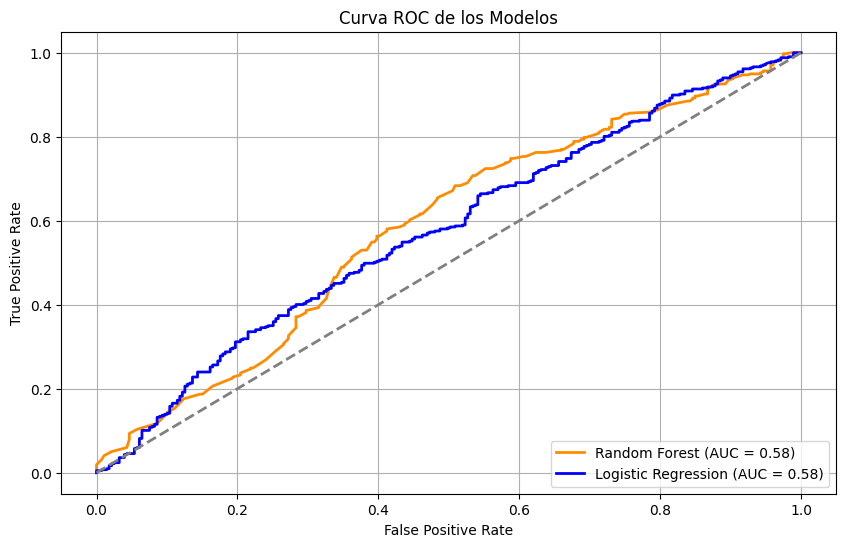

In [105]:
# Entrenar y evaluar Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Precisión del modelo Random Forest:", accuracy_rf)
print("Reporte de clasificación (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Calcular y graficar curva ROC para Random Forest
try:
    y_pred_rf_proba = rf_clf.predict_proba(X_test)[:, 1]
    fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
except Exception as e:
    print("Error calculando la curva ROC para Random Forest:", e)
    fpr_rf, tpr_rf, roc_auc_rf = None, None, None

# Entrenar y evaluar Regresión Logística
lr_clf = LogisticRegression(max_iter=1000, random_state=42)
lr_clf.fit(X_train, y_train)
y_pred_lr = lr_clf.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Precisión del modelo Regresión Logística:", accuracy_lr)
print("Reporte de clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))

# Calcular y graficar curva ROC para Regresión Logística
try:
    y_pred_lr_proba = lr_clf.predict_proba(X_test)[:, 1]
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_lr_proba)
    roc_auc_lr = auc(fpr_lr, tpr_lr)
except Exception as e:
    print("Error calculando la curva ROC para Regresión Logística:", e)
    fpr_lr, tpr_lr, roc_auc_lr = None, None, None

# Graficar ambas curvas ROC
plt.figure(figsize=(10, 6))
if fpr_rf is not None and tpr_rf is not None:
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
if fpr_lr is not None and tpr_lr is not None:
    plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC de los Modelos")
plt.legend(loc="lower right")
plt.grid()
plt.show()

### Análisis de la Curva ROC y AUC
#### Curva ROC
- La Curva ROC compara la Tasa de Verdaderos Positivos (TPR) frente a la Tasa de Falsos Positivos (FPR) para diferentes umbrales de decisión.

#### Random Forest (AUC = 0.58):
- La curva muestra que el modelo tiene un desempeño apenas mejor que el azar (AUC > 0.5).
#### Regresión Logística (AUC = 0.58):
- Similar a Random Forest, su desempeño no es significativamente superior al azar.
#### Interpretación del AUC
#### AUC (Area Under Curve):
- Indica qué tan bien el modelo distingue entre las clases (0 y 1).
- 0.5 → El modelo es equivalente a hacer una predicción aleatoria.
- 1.0 → Predicción perfecta.
- En este caso, ambos modelos tienen un AUC bajo (0.58), lo que sugiere que hay espacio para mejorar.


#### Dado los resultados, probaremos un tercer modelo:

- Support Vector Machine (SVM)

Precisión del modelo SVM: 0.6077586206896551
Reporte de clasificación (SVM):
              precision    recall  f1-score   support

           0       0.55      0.13      0.21       279
           1       0.61      0.93      0.74       417

    accuracy                           0.61       696
   macro avg       0.58      0.53      0.47       696
weighted avg       0.59      0.61      0.53       696



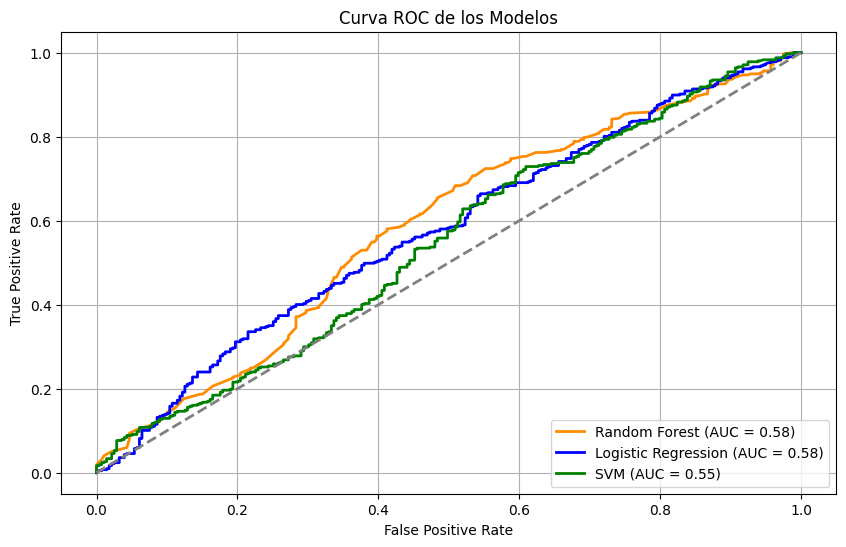

In [106]:
# Entrenar y evaluar Support Vector Machine (SVM)
svm_clf = SVC(probability=True, random_state=42)
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Precisión del modelo SVM:", accuracy_svm)
print("Reporte de clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))

# Calcular y graficar curva ROC para SVM
try:
    y_pred_svm_proba = svm_clf.predict_proba(X_test)[:, 1]
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_svm_proba)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
except Exception as e:
    print("Error calculando la curva ROC para SVM:", e)
    fpr_svm, tpr_svm, roc_auc_svm = None, None, None

# Graficar todas las curvas ROC
plt.figure(figsize=(10, 6))
if fpr_rf is not None and tpr_rf is not None:
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f"Random Forest (AUC = {roc_auc_rf:.2f})")
if fpr_lr is not None and tpr_lr is not None:
    plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})")
if fpr_svm is not None and tpr_svm is not None:
    plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f"SVM (AUC = {roc_auc_svm:.2f})")
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC de los Modelos")
plt.legend(loc="lower right")
plt.grid()
plt.show()

- SVM (AUC = 0.55): Aunque tiene una precisión del 60.77%, su AUC es menor, lo que indica que es menos efectivo separando las clases.

#### Conclusión Final del Modelo de Fallecimiento Inmediato
- Tras realizar el análisis, ajuste de hiperparámetros y evaluación de los modelos, aquí están los puntos clave:

#### Modelos Evaluados:

- Random Forest: Mejor rendimiento general con un AUC moderado (≈ 0.58) y una precisión que mejoró tras el ajuste.
- Regresión Logística: Similares resultados a Random Forest, aunque menos flexible para datos no lineales.
- SVM: Menor rendimiento general (AUC ≈ 0.55), lo que sugiere que este modelo no captura bien las características de los datos.
#### Conclusión sobre los Resultados:

- Los modelos tienen un rendimiento limitado debido a las variables predictoras actuales, que no parecen ser lo suficientemente fuertes para predecir de forma efectiva el fallecimiento inmediato.
#### Es posible mejorar el rendimiento mediante:
- Ingeniería de Características: Crear nuevas variables como densidad de tráfico, clima o zonas específicas.
- Obtención de Datos Adicionales: Factores relacionados con el estado del accidente, como respuesta médica.

#### Nuestro siguiente intento de predicción es:
- ¿Qué condiciones pueden permitir que una víctima sobreviva más tiempo tras el accidente?

#### Nuevamente, nuestra variable objetivo es 'Fallecido a los Dias'


In [107]:
# Seleccionar variables predictoras
variables_predictoras = [
    "Tipo de Siniestro",
    "Vehiculo",
    "Rol",
    "Edad",
    "Grupo Etario",
    "Dia de la Semana",
    "Franja Horaria",
    "Departamento"
]

df_predictoras = df[variables_predictoras]

In [108]:
# Convertir variables categóricas en numéricas usando Label Encoding
categorical_cols = ["Tipo de Siniestro", "Vehiculo", "Rol", "Grupo Etario", "Dia de la Semana", "Franja Horaria", "Departamento"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_predictoras[col] = le.fit_transform(df_predictoras[col])
    label_encoders[col] = le  # Guardar los codificadores por si se necesitan después

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_predictoras, df["Fallecido a los Dias"], test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos divididos
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Entrenar y evaluar Random Forest Regressor
rf_reg = RandomForestRegressor(random_state=42, n_estimators=100)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_rf))
print("R2 Score:", r2_score(y_test, y_pred_rf))

# Entrenar y evaluar Linear Regression
lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
y_pred_lr = lr_reg.predict(X_test)
print("Linear Regression:")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R2 Score:", r2_score(y_test, y_pred_lr))

# Entrenar y evaluar Support Vector Regressor (SVR)
svr_reg = SVR(kernel='rbf')
svr_reg.fit(X_train, y_train)
y_pred_svr = svr_reg.predict(X_test)
print("Support Vector Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("R2 Score:", r2_score(y_test, y_pred_svr))


C:\Users\chris\AppData\Local\Temp\ipykernel_12828\3526044502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictoras[col] = le.fit_transform(df_predictoras[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_12828\3526044502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predictoras[col] = le.fit_transform(df_predictoras[col])
C:\Users\chris\AppData\Local\Temp\ipykernel_12828\3526044502.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

Tamaño del conjunto de entrenamiento: (2780, 8)
Tamaño del conjunto de prueba: (696, 8)
Random Forest Regressor:
MSE: 19.26903672803247
R2 Score: -0.2621601548584773
Linear Regression:
MSE: 15.177077096540698
R2 Score: 0.0058713235726530755
Support Vector Regressor:
MSE: 16.884516263113564
R2 Score: -0.10596933111652862


### Conclusión
#### Ninguno de los modelos actuales tiene un rendimiento adecuado para predecir el tiempo de supervivencia, posiblemente debido a:

- Variables predictoras insuficientes: Las características actuales no explican lo suficiente sobre las condiciones que afectan la supervivencia.
- Naturaleza de los datos: Podría haber ruido en los datos o relaciones no lineales más complejas que los modelos no están capturando.

#### Debnido a esto, probaremos con un tercer modelo; XGboost.

In [109]:
# Entrenar y evaluar XGBoost Regressor
xgb_reg = XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1, max_depth=6)
xgb_reg.fit(X_train, y_train)
y_pred_xgb = xgb_reg.predict(X_test)
print("XGBoost Regressor:")
print("MSE:", mean_squared_error(y_test, y_pred_xgb))
print("R2 Score:", r2_score(y_test, y_pred_xgb))

XGBoost Regressor:
MSE: 17.26087188720703
R2 Score: -0.1306213140487671


### Conclusión General
#### Desempeño Limitado:
- Ninguno de los modelos (incluido XGBoost) logra capturar suficientemente las relaciones en los datos para predecir de manera precisa el tiempo de supervivencia (Fallecido a los Días).



# Conclusiones Principales
#### Fallecimientos inmediatos:
- La franja horaria nocturna y los fines de semana mostraron una mayor incidencia de accidentes graves.
- Los roles de Peatón y Ciclista están asociados con un mayor riesgo.
#### Tiempo de supervivencia:
- No se identificaron patrones claros debido a la falta de variables relacionadas con la atención post-accidente y condiciones médicas.
#### Modelos predictivos:
- Los resultados subrayan la necesidad de incorporar datos adicionales y realizar ingeniería de características para mejorar el rendimiento de los modelos.

# Resultado Final
- El proyecto evidenció los patrones de riesgo en fallecimientos por siniestros y subrayó la importancia de variables adicionales para realizar predicciones precisas.
- Los modelos actuales tienen una capacidad limitada debido a restricciones en los datos disponibles, pero sientan una base sólida para análisis futuros.